<a href="https://colab.research.google.com/github/ericwang10/2020-Presidential-Election-Sentiment-Predictor/blob/main/AI_sentiment_Election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Collection Colab: Twitter Data collection

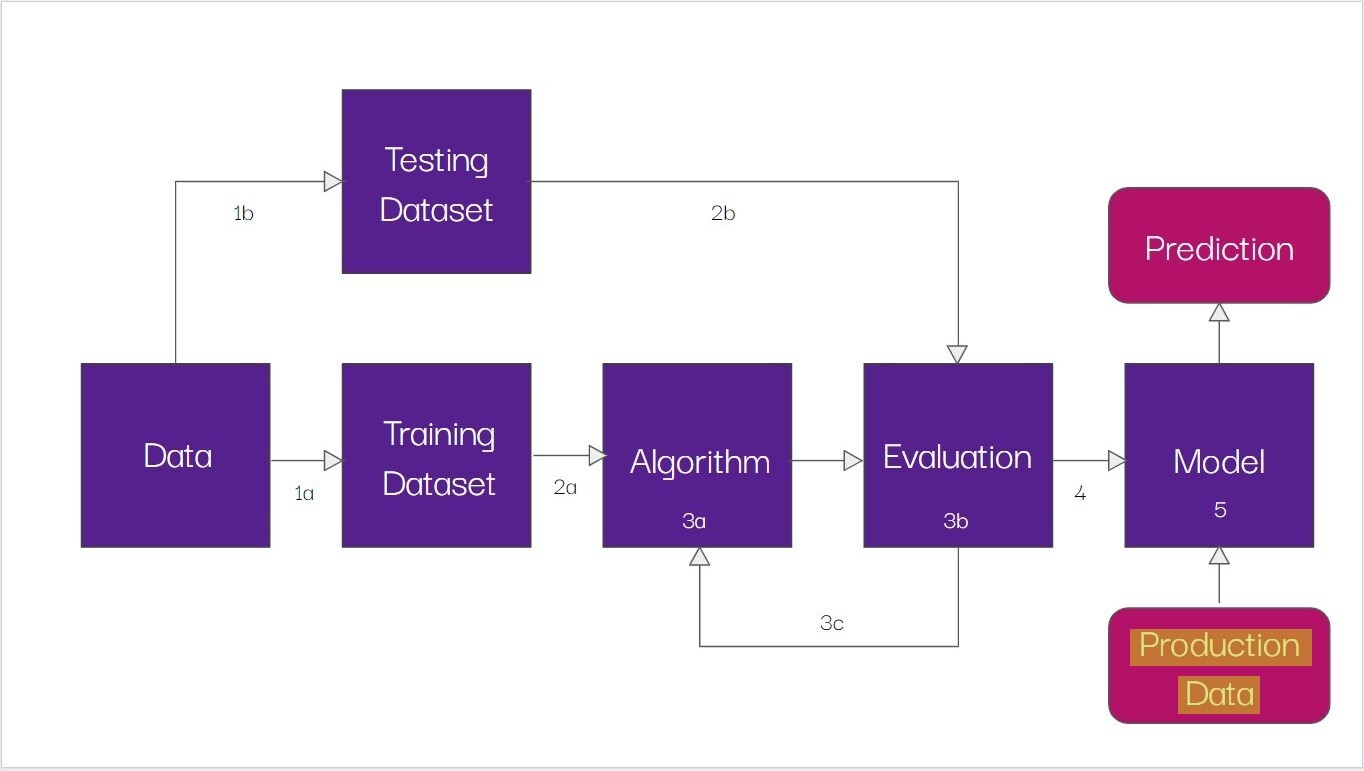

Import some libraries we will be using


In [ ]:
import os
#twitter api wrapped into easy-to-use functions 
import tweepy as tw 

#dataframe work
import pandas as pd 
import numpy as np

#text editing stuff
from bs4 import BeautifulSoup 
!pip install emoji
import emoji
import re 

#machine learning package
!pip install fasttext
import fasttext 


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Explain what these keys are used for

In [ ]:
# some hashtags to look out for #dumptrump, #GoJoe 
apikeys = pd.read_csv("/content/gdrive/My Drive/api keys.csv", engine = 'python')

consumer_key= apikeys['0'][0]
consumer_secret= apikeys['0'][1]
access_token= apikeys['0'][2]
access_token_secret= apikeys['0'][3]

Explain the authentication part

In [ ]:
#API authentication
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


Explain briefly the text cleaning process

In [ ]:
def cleanTextV2(text): #method that formats and processes all the text, more proccessing might be needed
    """
    Text cleaner for tweets to remove all the junk that can't be analyzed by the neural network
    :param text: the text to be processed
    :return: the processed text
    """
    tweet = BeautifulSoup(text).get_text() #converts things like &amp to &
    tweet = emoji.demojize(tweet, delimiters = ("","")) #turn emojis into text
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) #r tells python that expression is a raw string 
    tweet = re.sub(r'#','',tweet) #remove hashtag
    tweet = re.sub(r'RT[\s]+','',tweet) #remove retweet
    tweet = re.sub(r'https?:\/\/\S+', '',tweet) #remove hyperlinks
    tweet = re.sub("[\.\,\!\?\:\;\-\=\'\_\’]", " ", tweet) #remove punctuation
    tweet = re.sub("\n"," ",tweet) #remove \n which makes a new line
    tweet = tweet.lower()
    tweet = tweet.strip()
    return tweet

Explain the hashtag searching method and its attributes


In [ ]:
def searchByHashTag(search_words ="#Trump", date_since = "2020-10-30",amount = 10): #the method that uses api to find tweets by HASHTAG
    """
    Using api to search for tweets, configure all the settings through passing the parameters

    :param search_words: the hashtag you want to search for
    :param date_since: the date in YYYY-MM-DD format from which you want to grab tweets from
    :param amount: amount of tweets you want to grab
    :return: dataframe of the tweets
    """
    search_words += " -filter:retweets"
    tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since,
                       tweet_mode = 'extended').items(amount) #tweetmode extended to prevent truncation
    tweet_list = [cleanTextV2(tweet.full_text) for tweet in tweets]
    df = pd.DataFrame(data=tweet_list, columns=['Tweets'])
    return df

@realDonaldTrump The worst thing about #Trump is not that he’s a narcissistic, lying, serve-the-filthy-rich con man. That’s well-established. He only cares about himself, that his supporters, they’re being played big time, 236,000 dead #Americans So disturbing.
https://t.co/XDyK8xKB1U

cleantext function--> 

the worst thing about trump is not that he s a narcissistic  lying  serve the filthy rich con man  that s well established  he only cares about himself  that his supporters  they re being played big time  236 000 dead americans so disturbing


In [ ]:
print(cleanTextV2(" 🔥 🔥"))

fire fire


Grab lots of tweets

In [ ]:
tweetlist = searchByHashTag("#Trump","2020-10-30",2000)
pd.set_option('display.max_colwidth', None) # can also use this to prevent dataframe from being truncated
print(tweetlist.iloc[0]["Tweets"]) #first tweet
print(tweetlist.head()) #preview
print(tweetlist.size) #look at size of tweets

if you don t have enough money to buy car or paid school bill dm +1(970)614)8794 me and you ll need to been trustworthy and loyal sugar babies needed asapmoney bagmoney bagunited statesunited statesunited statesbeating heartbeating heartbeating heart  biden trump electionday  usaelections trumpcollapse florida  election2020  electionnight
                                                                                                                                                                                                                                                                                                                                                 Tweets
0  if you don t have enough money to buy car or paid school bill dm +1(970)614)8794 me and you ll need to been trustworthy and loyal sugar babies needed asapmoney bagmoney bagunited statesunited statesunited statesbeating heartbeating heartbeating heart  biden trump electionday  usaelections trumpcollapse florida 

Grab some more hashtags

In [ ]:
bidenlist = searchByHashTag("#Biden","2020-10-30",2000)
DumpTrump = searchByHashTag("#DumpTrump","2020-10-30",500)

In [ ]:
SlowJoe = searchByHashTag("#SlowJoe","2020-10-25",500)
goJoe = searchByHashTag("#GoJoe","2020-10-30",500)
goTrump = searchByHashTag("#GoTrump","2020-10-30",500)

# Model Training: FastText


In [ ]:
!pip install fasttext
import fasttext 

In [ ]:
# 4 is positive, 0 is negative
f = open('train.txt', 'w')
f.write('__label__4 Trump is awesome and a great candidate\n')
f.write('__label__4 Trump rocks the house\n')
f.write('__label__4 Donald good\n')
f.write('__label__4 None stand before the big Donald\n')
f.write('__label__4 Trump is a good candidate')
f.write('__label__0 Donald sucks\n')
f.write('__label__0 Trump is not a good condidate\n')
f.write('__label__0 If Trump wins this thing, im moving to Canada')
f.close()

f = open('test.txt', 'w')
f.write('trump good')
f.close()

In [ ]:
!./fasttext supervised -input train.txt -output model -dim 2

/bin/bash: ./fasttext: No such file or directory


In [ ]:
!cat test.txt
!./fasttext predict model.bin test.txt

trump good/bin/bash: ./fasttext: No such file or directory


#**Building the model**

## Data processing 

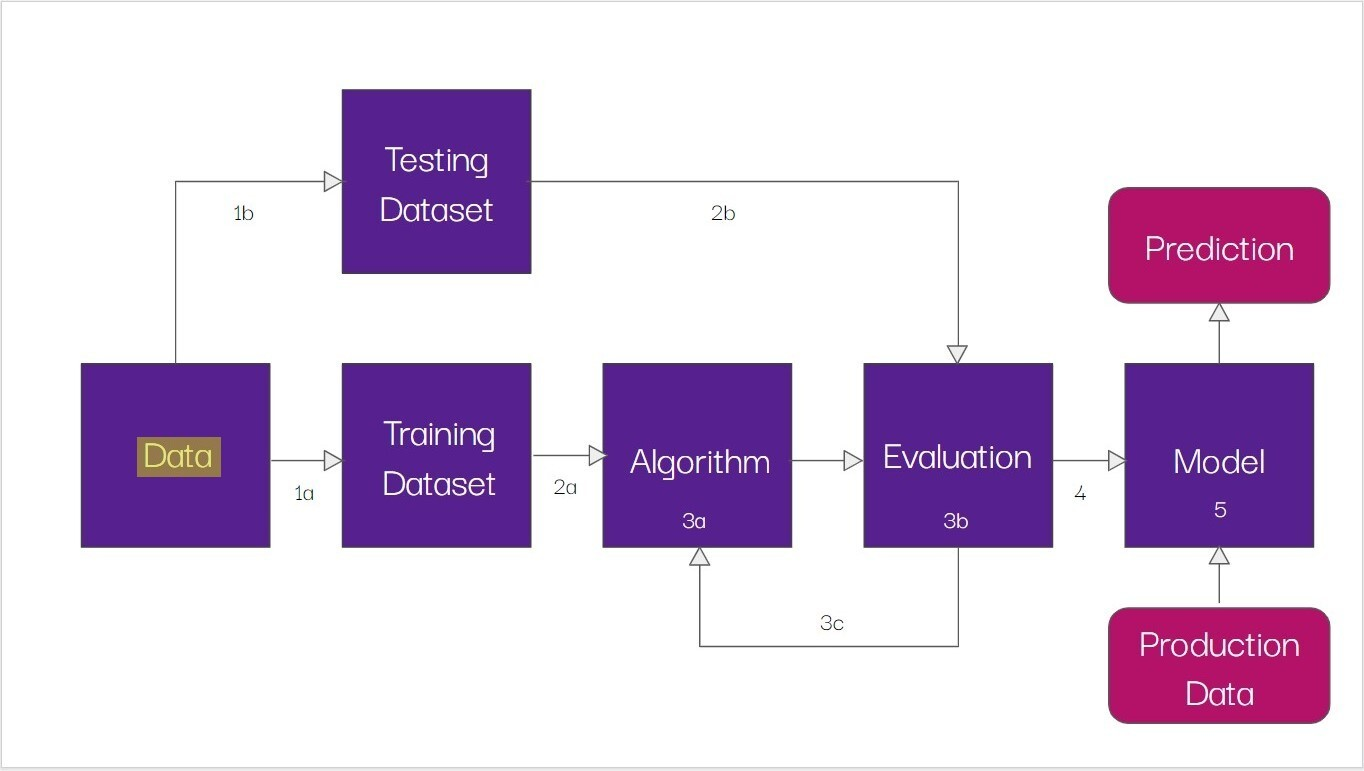


Preprocessing

In [ ]:
training_data = pd.read_csv('/content/gdrive/My Drive/WFN 20 21/Education/AI Elections/training full.csv', engine='python')

In [ ]:
print(training_data.shape)

(1599999, 6)


In [ ]:
training_data.columns =["1",'2','3','4','5','6']
training_data = training_data.drop(['2','3','4','5'], axis = 1)
training_data.columns =["Polarity","Tweet"]
print(training_data)

         Polarity                                                                                                            Tweet
0               0  is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
1               0                        @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
2               0                                                                  my whole body feels itchy and like its on fire 
3               0  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
4               0                                                                                    @Kwesidei not the whole crew 
...           ...                                                                                                              ...
1599994         4                                                         Just woke

cleaning

In [ ]:
training_data['Tweet'] = training_data['Tweet'].map(cleanTextV2)

In [ ]:
print(training_data.to_string)

<bound method DataFrame.to_string of          Polarity                                                                                                           Tweet
0               0  is upset that he can t update his facebook by texting it    and might cry as a result  school today also  blah
1               0                                 i dived many times for the ball  managed to save 50%  the rest go out of bounds
2               0                                                                  my whole body feels itchy and like its on fire
3               0                    no  it s not behaving at all  i m mad  why am i here  because i can t see you all over there
4               0                                                                                              not the whole crew
...           ...                                                                                                             ...
1599994         4                                    

Adding labels

In [ ]:
training_data['Tweet'] = pd.np.where(training_data['Polarity'] == 0, "__label__NEGATIVE "+ training_data['Tweet'], training_data['Tweet'])
training_data['Tweet'] = pd.np.where(training_data['Polarity'] == 4, "__label__POSITIVE "+ training_data['Tweet'], training_data['Tweet'])

print(training_data['Tweet'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


0          __label__NEGATIVE is upset that he can t update his facebook by texting it    and might cry as a result  school today also  blah
1                                         __label__NEGATIVE i dived many times for the ball  managed to save 50%  the rest go out of bounds
2                                                                          __label__NEGATIVE my whole body feels itchy and like its on fire
3                            __label__NEGATIVE no  it s not behaving at all  i m mad  why am i here  because i can t see you all over there
4                                                                                                      __label__NEGATIVE not the whole crew
                                                                         ...                                                               
1599994                                                           __label__POSITIVE just woke up  having no school is the best feeling ever
1599995             

##Splitting our dataset into two

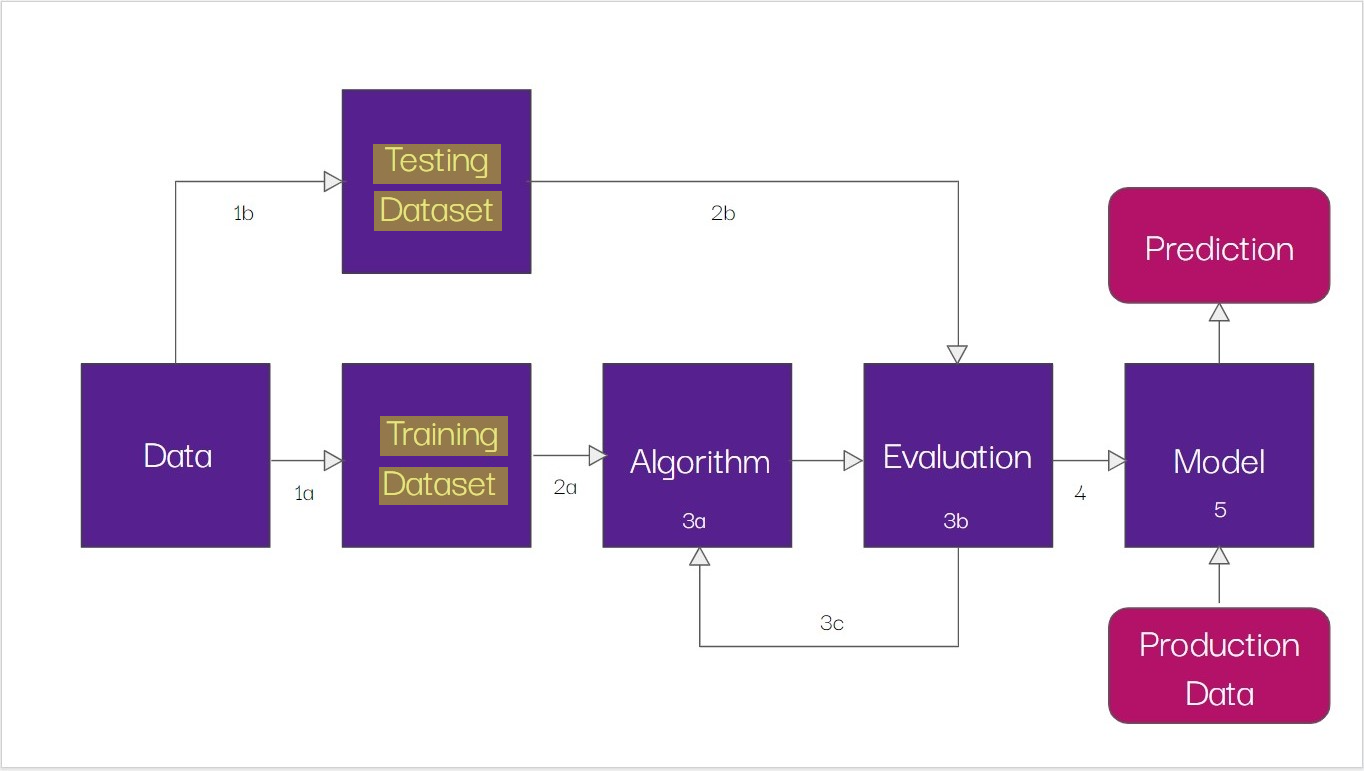

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(training_data, test_size = 0.2)
print(training_data.shape)
print(train)
print(test)

(1599999, 2)
         Polarity                                                                                                                                                       Tweet
1533324         4  __label__POSITIVE after a busy morning had some good news feeling positive today and now believe i ve made the right choice  things do happen for a reason
511867          0                                                                                 __label__NEGATIVE ah  that would explain  why your desk is empty  what s up
553728          0                                                                    __label__NEGATIVE ok is now 15 min into 17th and no updates on itunes for os 3 0  � �� �
1180464         4                                      __label__POSITIVE haha  that made me laugh  i used to play with those a lot     but i wonder whatever happened to them
1597451         4                                             __label__POSITIVE yep  i am more the nosy type   love r

In [ ]:
np.savetxt('data.train', train['Tweet'].values, fmt='%s')
np.savetxt('data.test', test['Tweet'].values, fmt='%s')

##Training our model

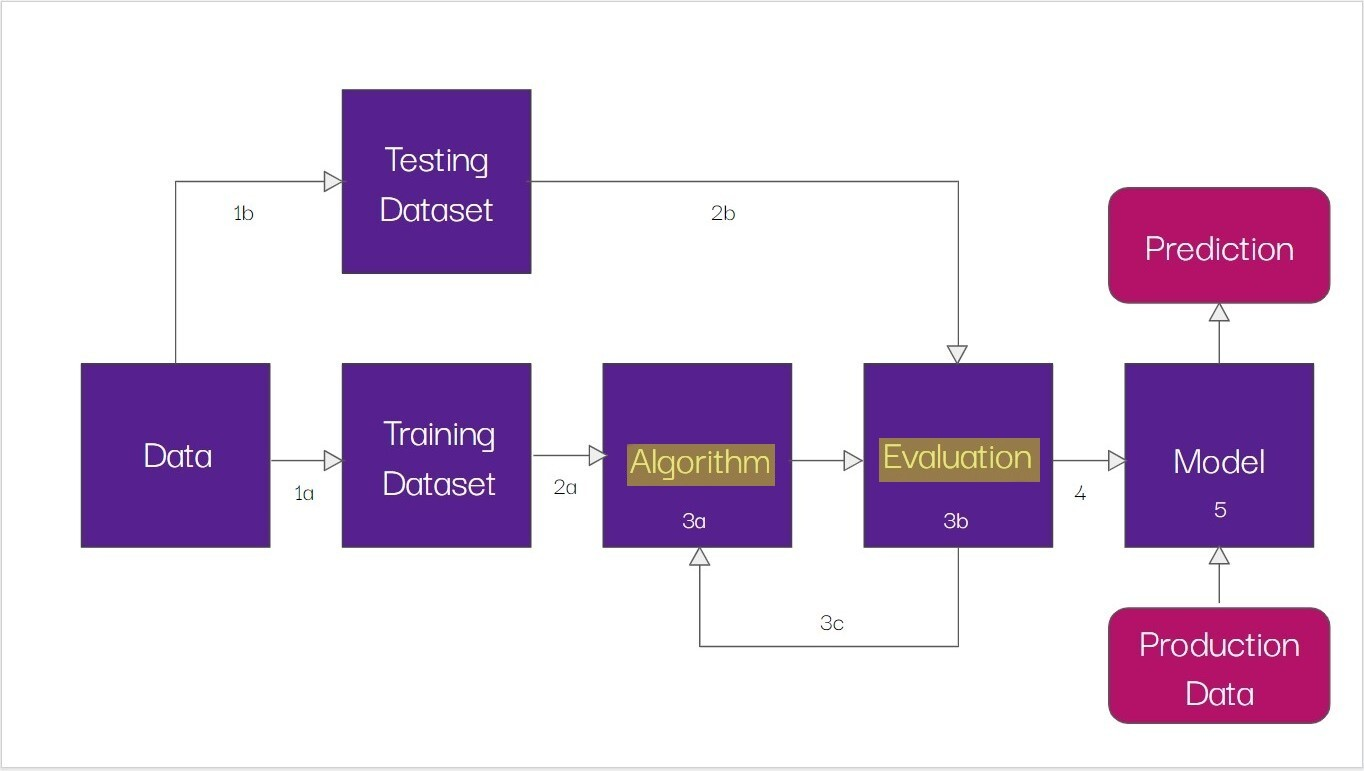

In [ ]:
# Train the model and save it. 
model = fasttext.train_supervised(input="data.train", wordNgrams = 2, epoch = 25, lr = 0.01, verbose = 2)
print("Model trained")
model.save_model("/content/gdrive/My Drive/WFN 20 21/Education/AI Elections/model1.bin")

Model trained


Evaluating training and model fit using our testing dataset

In [ ]:
#If we have a saved model we can load it
model = fasttext.load_model("/content/gdrive/My Drive/WFN 20 21/Education/AI Elections/model1.bin")

In [ ]:
print(model.test("data.test"))

(320000, 0.802671875, 0.802671875)


Some strings we can input to test our model

In [ ]:
print(cleanTextV2("i cry when i see myself"), model.predict(cleanTextV2("i cry when i see myself"))[0])
print(cleanTextV2("WFN is amazing 🔥 🔥 🔥 🏆 🏆 🏆 "),model.predict(cleanTextV2("WFN is amazing 🔥 🔥 🔥 🏆 🏆 🏆"))[0])
print(cleanTextV2("im a god at creating ai sentiment"),model.predict(cleanTextV2("im a god at creating ai sentiment"))[0])

print("\nPOLITICAL TEXTS")

politicaltext1 = cleanTextV2("I approve of Trump's social policies")
politicaltext2 = cleanTextV2("Trump's perspective towards climate change have led to poor consequences")
politicaltext3 = cleanTextV2("Biden's great decision to listen to the scientists will allow the USA to recover faster from COVID")

print(politicaltext1, model.predict(politicaltext1)[0])
print(politicaltext2, model.predict(politicaltext2)[0])
print(politicaltext3, model.predict(politicaltext3)[0])

print("\nINCONSISTENCIES")
print("i am indifferent towards biden", model.predict("I am indifferent towards biden")[0])
print("i am neutral about the election", model.predict("i am neutral about the election")[0])


i cry when i see myself ('__label__NEGATIVE',)
wfn is amazing fire fire fire trophy trophy trophy ('__label__POSITIVE',)
im a god at creating ai sentiment ('__label__POSITIVE',)

POLITICAL TEXTS
i approve of trump s social policies ('__label__POSITIVE',)
trump s perspective towards climate change have led to poor consequences ('__label__NEGATIVE',)
biden s great decision to listen to the scientists will allow the usa to recover faster from covid ('__label__POSITIVE',)

INCONSISTENCIES
i am indifferent towards biden ('__label__POSITIVE',)
i am neutral about the election ('__label__POSITIVE',)


#Testing our model with twitter data


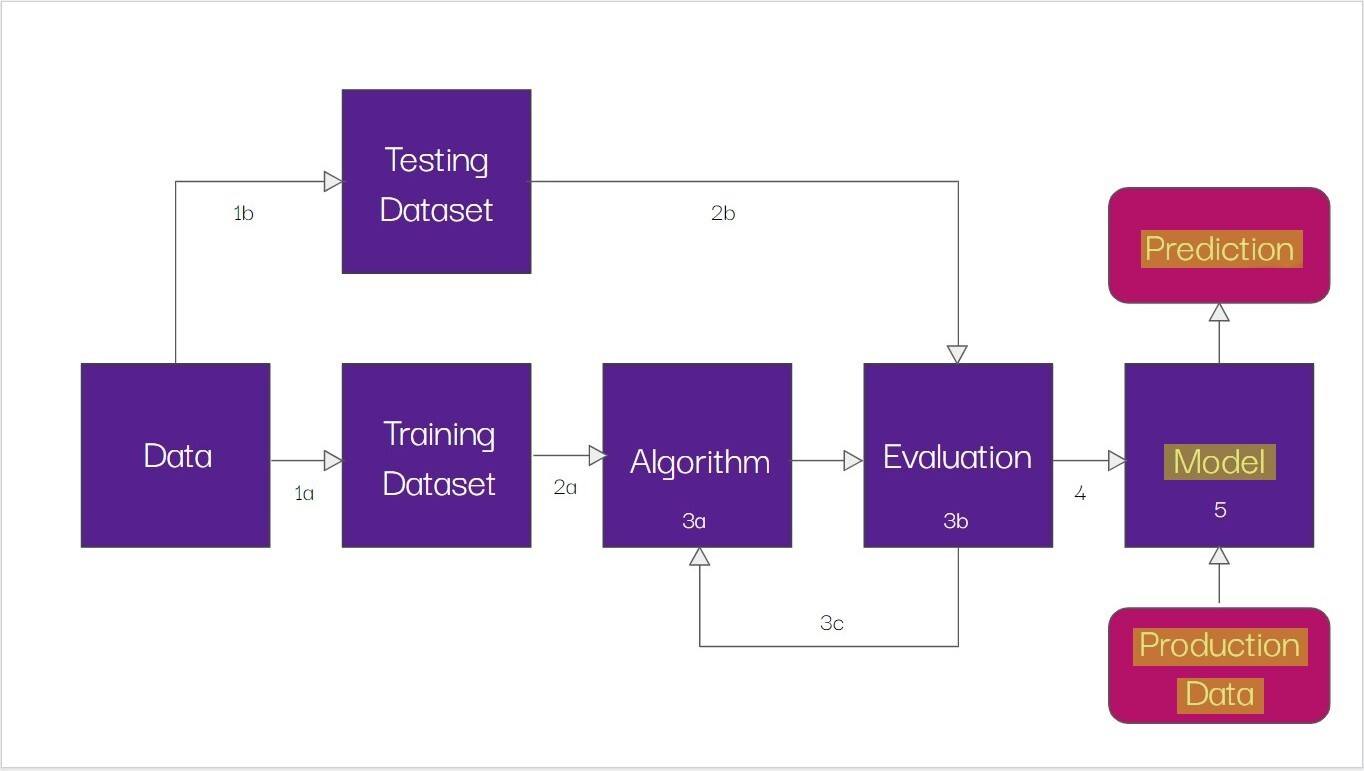

In [ ]:
def getPrediction(text):
  return str(model.predict(text)[0])

In [ ]:
#For Trump's tweets
tweetlist['Model sentiment'] = tweetlist['Tweets'].map(getPrediction)
print(tweetlist['Model sentiment'])

0       ('__label__POSITIVE',)
1       ('__label__POSITIVE',)
2       ('__label__NEGATIVE',)
3       ('__label__POSITIVE',)
4       ('__label__POSITIVE',)
                 ...          
1995    ('__label__POSITIVE',)
1996    ('__label__POSITIVE',)
1997    ('__label__NEGATIVE',)
1998    ('__label__NEGATIVE',)
1999    ('__label__POSITIVE',)
Name: Model sentiment, Length: 2000, dtype: object


In [ ]:
#For everyone else 
bidenlist["Model sentiment"] = bidenlist['Tweets'].map(getPrediction)
DumpTrump["Model sentiment"] = DumpTrump['Tweets'].map(getPrediction)
SlowJoe["Model sentiment"] = SlowJoe['Tweets'].map(getPrediction)
goJoe["Model sentiment"] = goJoe['Tweets'].map(getPrediction)
goTrump["Model sentiment"] = goTrump['Tweets'].map(getPrediction)
all_model_sentiment = [tweetlist["Model sentiment"], bidenlist["Model sentiment"], DumpTrump["Model sentiment"], SlowJoe["Model sentiment"], goJoe["Model sentiment"], goTrump["Model sentiment"]]

Creating a table to track sentiment evaluated by our model

In [ ]:
hashtags ={'Hashtags':["Trump","Biden","DumpTrump","SlowJoe","GoTrump","GoJoe"]}
prediction_table = pd.DataFrame(hashtags)

positive_count = 0
negative_count = 0
neutral_count = 0
positivelist =[]
negativelist =[]
neutrallist = []
model_portionpositive = []
for sentiment in all_model_sentiment:
  for rating in sentiment:
    if "__label__POSITIVE" in rating:
      positive_count+=1
    else:
      negative_count +=1
  positivelist.append(positive_count)
  negativelist.append(negative_count)
  model_portionpositive.append(positive_count/(positive_count+negative_count))
  positive_count = 0
  negative_count = 0

prediction_table["Positive ratings"] = positivelist
prediction_table["Negative ratings"] = negativelist
prediction_table["Proportion Positive"] = model_portionpositive

In [ ]:
prediction_table

,Hashtags,Positive ratings,Negative ratings,Proportion Positive
0,Trump,1267,733,0.633500
1,Biden,1515,485,0.757500
2,DumpTrump,327,173,0.654000
3,SlowJoe,59,38,0.608247
4,GoTrump,316,184,0.632000
5,GoJoe,88,47,0.651852


#API Sentiment

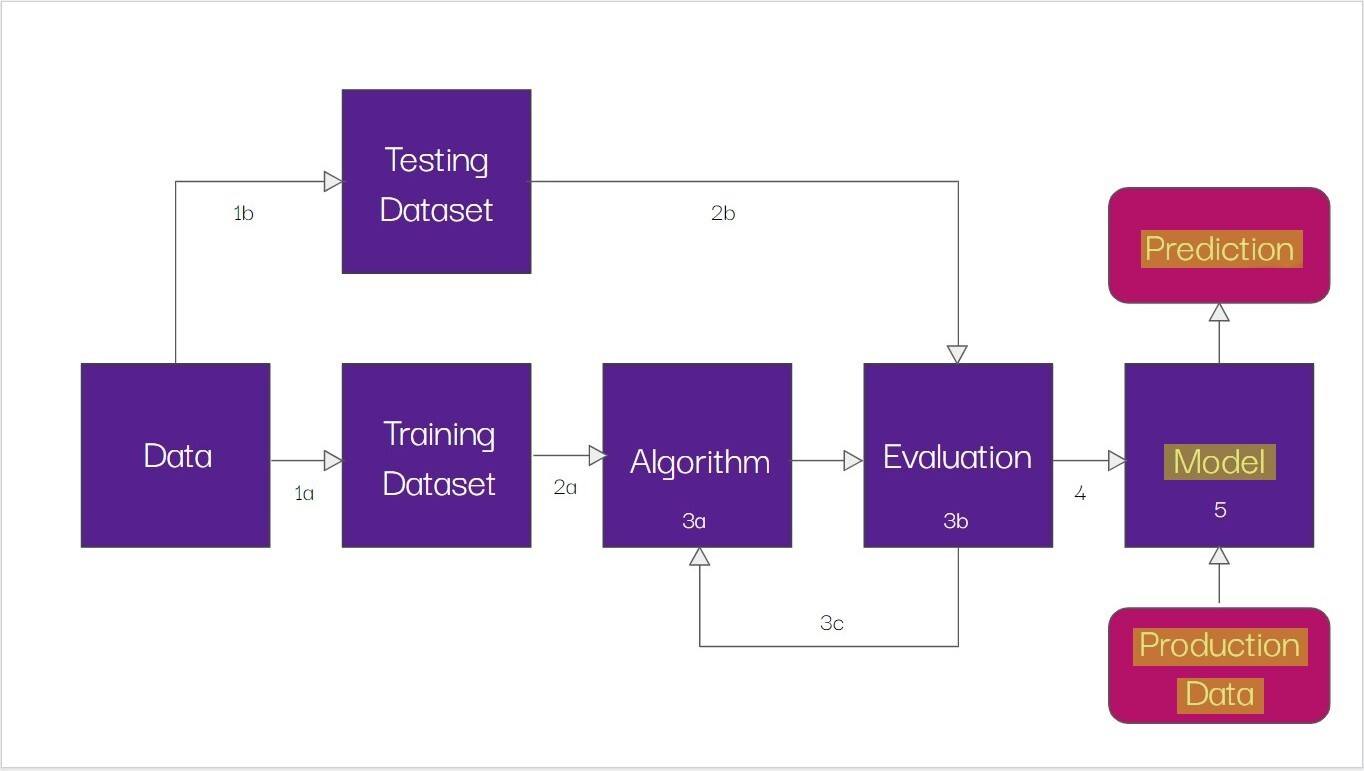

Textblob package 

In [ ]:
from textblob import TextBlob

Define two methods we will be using

In [ ]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def apply_API_sentiment(df):
    return df["Tweets"].apply(getPolarity)

In [ ]:
print(getPolarity("I love trump!!"))
print(getPolarity("I hate trump!!"))

0.78125
-1.0


Run sentiment analysis for our tweets

In [ ]:
pd.set_option('display.max_colwidth', None) # use this to prevent dataframe from being truncated
tweetlist["sentiment"] = apply_API_sentiment(tweetlist)
print(tweetlist)

                                                                                                                                                                                                                                                                                                                                                    Tweets  ... sentiment
0     if you don t have enough money to buy car or paid school bill dm +1(970)614)8794 me and you ll need to been trustworthy and loyal sugar babies needed asapmoney bagmoney bagunited statesunited statesunited statesbeating heartbeating heartbeating heart  biden trump electionday  usaelections trumpcollapse florida  election2020  electionnight  ...  0.166667
1                                                                                                                                                                                      most powerful country in the world  with a third world voting system face with tears of joy a

Examples

Analyze the sentiment

In [ ]:
#mean sentiment of #Trump
print(tweetlist["sentiment"].mean())

0.10397822014146563


In [ ]:
#finding mean sentiment of hashtags 
bidenlist["sentiment"] = apply_API_sentiment(bidenlist)
DumpTrump["sentiment"] = apply_API_sentiment(DumpTrump)
SlowJoe["sentiment"] = apply_API_sentiment(SlowJoe)
goJoe["sentiment"] = apply_API_sentiment(goJoe)
goTrump["sentiment"] = apply_API_sentiment(goTrump)
all_sentiment = [tweetlist["sentiment"], bidenlist["sentiment"], DumpTrump["sentiment"],SlowJoe["sentiment"],goJoe["sentiment"],goTrump["sentiment"]]

In [ ]:
#tabulating mean sentiment for all hashtags 
hashtags ={'Hashtags':["Trump","Biden","DumpTrump","SlowJoe","GoTrump","GoJoe"]}
sentiment_table = pd.DataFrame(hashtags)
hashtag_sentiment = [tweetlist["sentiment"].mean(), bidenlist["sentiment"].mean(), DumpTrump["sentiment"].mean(), SlowJoe["sentiment"].mean(), goTrump["sentiment"].mean()
, goJoe["sentiment"].mean()]
sentiment_table["Sentiment"] = hashtag_sentiment
sentiment_table

,Hashtags,Sentiment
0,Trump,0.103978
1,Biden,0.116710
2,DumpTrump,0.069552
3,SlowJoe,0.081250
4,GoTrump,0.191792
5,GoJoe,0.120760


In [ ]:
#counting sentiment
#greater than 0 is positive
#less than 0 is negative
#0 is neutral
positive_count = 0
negative_count = 0
neutral_count = 0
positivelist =[]
negativelist =[]
neutrallist = []
API_portionpositive = []
for sentiment in all_sentiment:
  for rating in sentiment:
    if rating>0:
      positive_count+=1
    elif rating<0:
      negative_count +=1
    else:
      neutral_count += 1
  positivelist.append(positive_count)
  negativelist.append(negative_count)
  neutrallist.append(neutral_count)
  API_portionpositive.append(positive_count/(positive_count+negative_count+neutral_count))
  positive_count = 0
  negative_count = 0
  neutral_count = 0
sentiment_table["Positive ratings"] = positivelist
sentiment_table["Negative ratings"] = negativelist
sentiment_table["Neutral ratings"] = neutrallist
sentiment_table["Portion positive"] = API_portionpositive

#Making predictions about the election

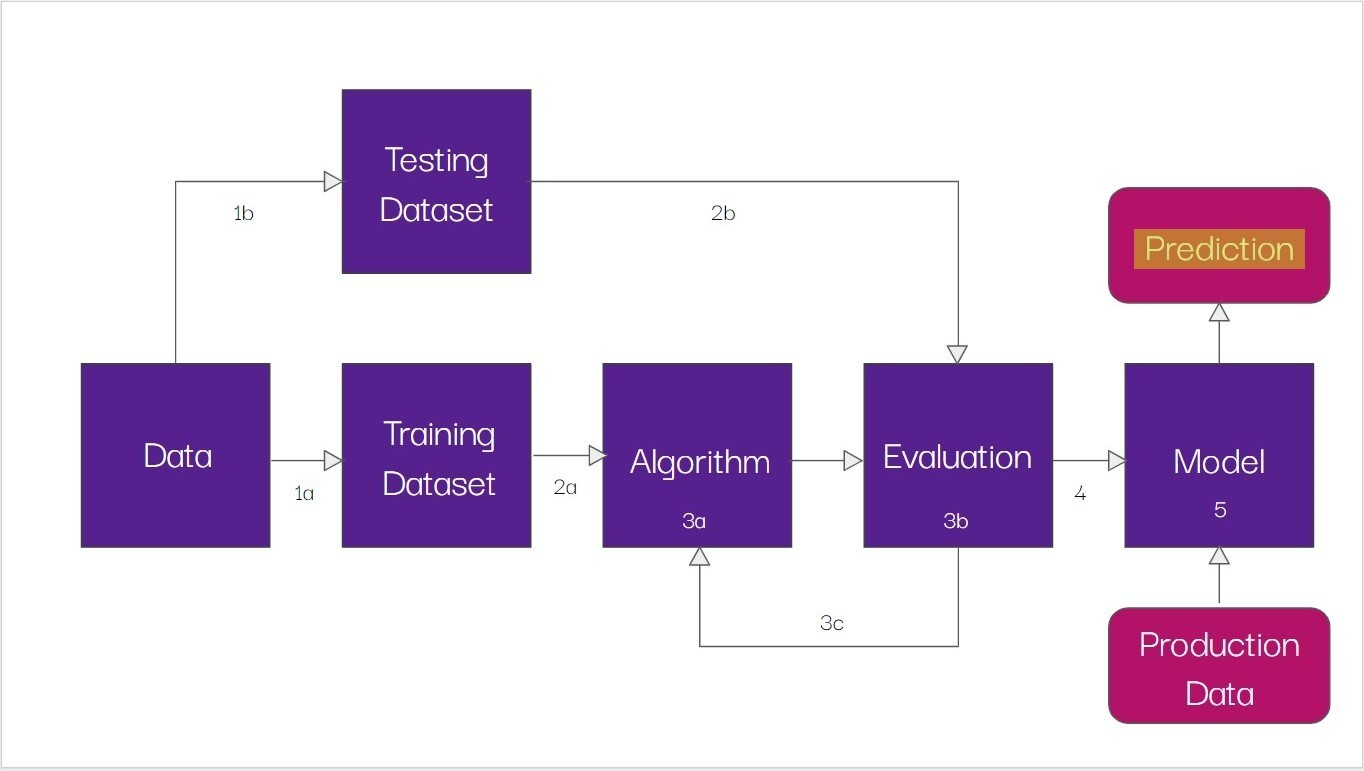

In [ ]:
#displaying all our data
pd.set_option('display.max_columns',None)
print("This is our model's predictions")
print(prediction_table)
print("\nThis is the API model's predictions")
print(sentiment_table)

This is our model's predictions
    Hashtags  Positive ratings  Negative ratings  Proportion Positive
0      Trump              1267               733             0.633500
1      Biden              1515               485             0.757500
2  DumpTrump               327               173             0.654000
3    SlowJoe                59                38             0.608247
4    GoTrump               316               184             0.632000
5      GoJoe                88                47             0.651852

This is the API model's predictions
    Hashtags  Sentiment  Positive ratings  Negative ratings  Neutral ratings  \
0      Trump   0.103978               895               417              688   
1      Biden   0.116710               973               348              679   
2  DumpTrump   0.069552               197               106              197   
3    SlowJoe   0.081250                40                22               35   
4    GoTrump   0.191792               213